# This notebook is a test of KNN algorithm input users

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('df_to_recommender.csv')

In [3]:
df.head()

,Unnamed: 0,names,Id,brewerId,ABV,style,appearance,aroma,palate,taste,...,year,user_id,beers_by_day,more_beers_than_10,too_much_beers,rate_recode,num_rated_beers,user_recode,beers_rated_by_user,enough_beers_rated
0,1065,Barrel Aged 2 Turtle Doves,63725,16866,13.0,Belgian Strong Dark Ale,4.5,4.5,4.0,5.0,...,2011,13938,1,0,0,1,561,1,1,0
1,1089,"Provisions Series, Cuádruple",65937,16866,10.0,Quadrupel (Quad),4.5,3.5,4.0,4.0,...,2011,13938,1,0,0,1,561,1,1,0
2,1114,"Provisions Series, The Workman's Friend",63413,16866,7.5,American Porter,4.0,4.0,4.0,4.0,...,2011,13938,3,0,0,1,561,1,1,0
3,1355,Key West Southernmost Wheat,42311,161,99.0,Witbier,3.5,4.0,3.5,4.0,...,2011,13938,5,0,0,1,561,1,1,0
4,1356,Southport Palace Pilsener,23163,5578,99.0,Czech Pilsener,4.0,4.0,4.0,4.0,...,2011,13938,5,0,0,1,561,1,1,0


In [4]:
df.shape

(7771, 27)

In [5]:
from sklearn.cross_validation import train_test_split

/home/alejandro/anaconda3/envs/beer/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
X = df[['overall', 'Id']]
y = df['profile_name']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [15]:
print (X_train.shape)
print (X_test.shape)

(5206, 2)
(2565, 2)


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
clf = KNeighborsClassifier(n_neighbors=20)

In [18]:
clf.fit(X,y)
# https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(clf.predict(X_test), y_test)

0.14230019493177387

In [21]:
clf.predict(X_test)

array([' paterlodie', ' Domingo', ' paterlodie', ..., ' Naerhu',
       ' Kegatron', ' GreenCard'], dtype=object)

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [24]:
accuracy_score(clf.predict(X_test), y_test)

0.14230019493177387

/home/alejandro/anaconda3/envs/beer/lib/python2.7/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


(array([ 3.,  2.,  2.,  0.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.043257  ,  0.04639609,  0.04953518,  0.05267426,  0.05581335,
         0.05895244,  0.06209153,  0.06523062,  0.06836971,  0.0715088 ,
         0.07464789]),
 <a list of 10 Patch objects>)

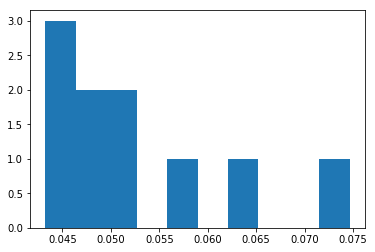

In [25]:
plt.hist (cross_val_score(clf, X,y, cv=10))